# Data Analyst Associate Practical Exam Submission

## Julius Kintop

## Data import and cleaning

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sales_DA.csv")
data.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [76]:
print(data.dtypes)

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object


In [77]:
data.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [78]:
data.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [79]:
print("Category: ", data["category"].unique())
print("Animal: ", data["animal"].unique())
print("Size: ", data["size"].unique())

Category:  ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
Animal:  ['Bird' 'Dog' 'Cat' 'Fish']
Size:  ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']


In [80]:
# Need to change the following column's data type: product_id, size, price, rating, repeat_purchase

# need to clean some columns as well

# also need to clean the columns in the process

# product_id
data["product_id"] = data["product_id"].astype(str) # change type to nominal
data["product_id"].describe()

count     1500
unique    1500
top          1
freq         1
Name: product_id, dtype: object

In [81]:
# category (has missings) (25 to be exact)
print(data["category"].value_counts())
data["category"] = data["category"].replace("-", "Unknown")
data["category"].unique()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64


array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [82]:
# size (needs to be ordinal and cleaned)
data["size"] = data["size"].str.lower()
data["size"] = pd.Categorical(data["size"], categories = ["small", "medium", "large"], ordered= True)
data["size"].describe()

count      1500
unique        3
top       small
freq        754
Name: size, dtype: object

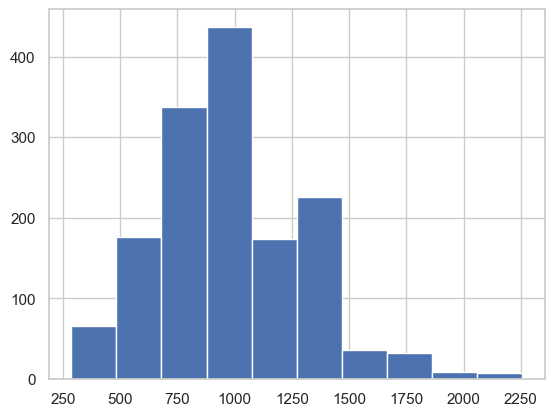

In [83]:
data["sales"].hist()
data["sales"] = data["sales"].round(2)

In [84]:
# price (needs to be continuous) and 150 "unlisted values"
data["price"] = data["price"].replace("unlisted", np.nan).astype(float)
data["price"].fillna(data["price"].median(), inplace=True)
data["price"] = data["price"].round(2)
data["price"].describe()

count    1500.000000
mean       29.287873
std         7.335833
min        12.850000
25%        25.000000
50%        28.060000
75%        33.142500
max        54.160000
Name: price, dtype: float64

In [85]:
# rating (needs to be discrete), and replace missings with 0
data["rating"] = data["rating"].fillna(0).astype(int)
data["rating"].describe()

count    1500.000000
mean        4.492000
std         2.105443
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: rating, dtype: float64

In [86]:
# repeat_purchase (needs to be nominal)
data["repeat_purchase"] = data["repeat_purchase"].astype(str)
data["repeat_purchase"].unique()

array(['1', '0'], dtype=object)

## Task 1

### For every column state whether the values match the description, how many missing values there are, and what you did to make values match that description



For product_id, it was intially an integer with no missing values, so all I had to do was change it to a nominal (string).

For category, it was initially nominal which was correct, but it had 25 values that did not contain a relevant category, so I replaced those values with "Unknown".

For animal, it was intially nominal with with no missing values, and the only unique values were Dog, Cat, Bird and Fish.

For size, the values did not exactly match the description because they were nominal instead of ordinal. There was also some cleaning I did to make them all lowercase, then made them ordinal.

For price, it needed to be continuous but it was instead nominal, and had 150 values that were missing, marked as "unlisted". I changed those to NaN's and then replaced those with the median of the sales (after changing the type to a continuous floating point) then made sure the values were rounded to two decimal places.

For sales, it was already continuous with no missing values, and all positive values which matched the description. I rounded it to two decimals as well. 

For rating, there were 150 missing values and it was continuous instead of discrete, so I started by replacing the NA values with 0, then converting the type to integer. 

For repeat_purchase, there were no missing values and only unique values of 1 and 0, but they were in integer form. I changed them to strings so they are nominal.

## Task 2

### Create a visualization that shows how many products are repeat purchases. Use the viz to 

a. state which category of the variable has the most observations

b. explain whether the observations are balanced across categories of the variable

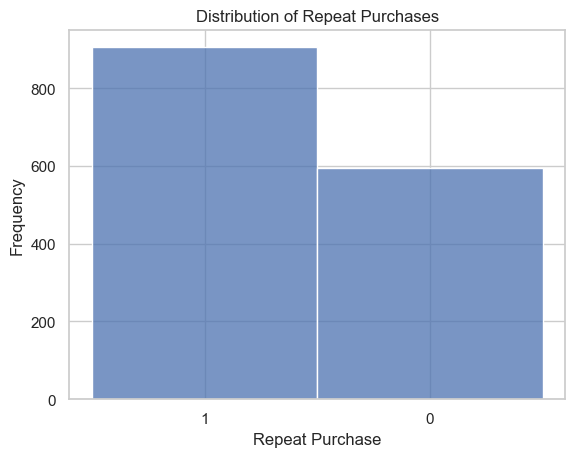

In [87]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()

# not using kernel density estimate since it is not continuous
sns.histplot(data['repeat_purchase'], ax=ax, kde=False)

ax.set_title('Distribution of Repeat Purchases')
ax.set_xlabel('Repeat Purchase')
ax.set_ylabel('Frequency')

plt.show()

There are definitely more repeat purchases than non-repeat purchases, where we see that there are over 800 repeats and a little less than 600 non-repeat purchases. These classes are not too imbalanced though, as that would mean that there are significantly more instances of one variable compared to the other.

## Task 3

### Describe the distribution of all of the sales (and include viz)

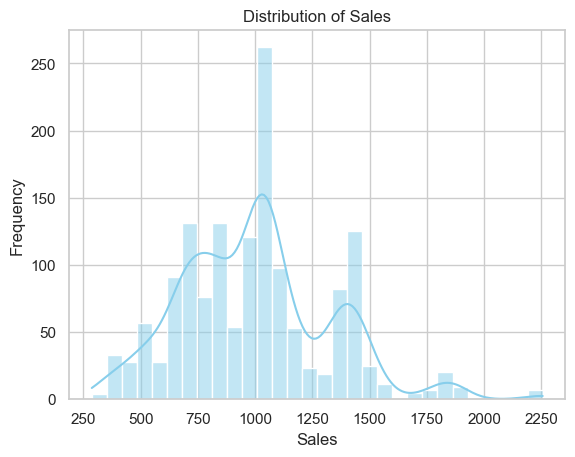

In [88]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()

# Create distribution plot, this time use kde
sns.histplot(data['sales'], ax=ax, kde=True, bins=30, color='skyblue')

ax.set_title('Distribution of Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')

plt.show()

The distribution is centered around 1000, with low sales being less than 750, and high sales being more than 1250. The distribution is trimodal, which means there are three ranges of sales totals that are more frequent than others. 

## Task 4

### Describe the relationship between repeat purchases and sales (include viz)

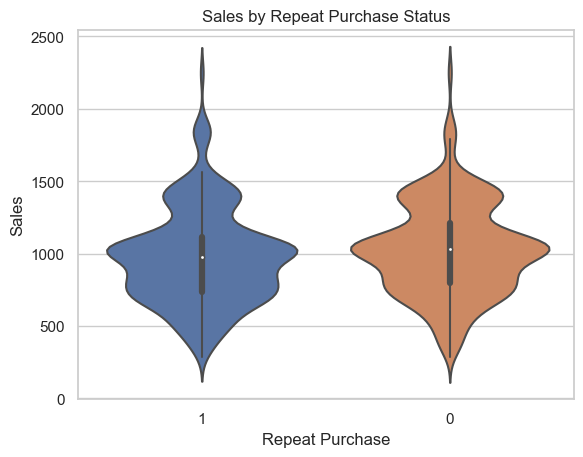

In [89]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()

# violin plot shows the density at each value of sales, and differentiates between levels of repeat_purchases
sns.violinplot(x='repeat_purchase', y='sales', data=data, ax=ax)

ax.set_title('Sales by Repeat Purchase Status')
ax.set_xlabel('Repeat Purchase')
ax.set_ylabel('Sales')

plt.show()

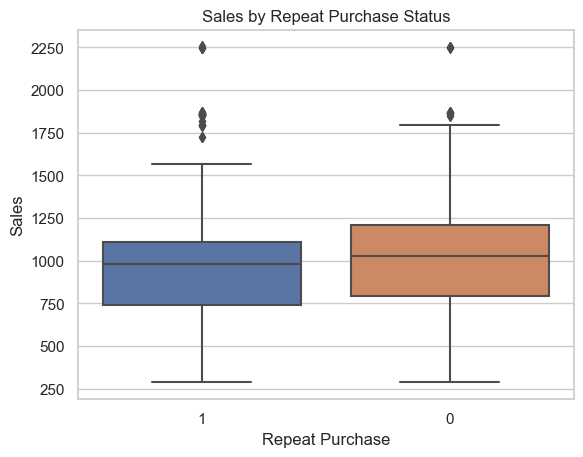

In [90]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()

sns.boxplot(x='repeat_purchase', y='sales', data=data, ax=ax)

ax.set_title('Sales by Repeat Purchase Status')
ax.set_xlabel('Repeat Purchase')
ax.set_ylabel('Sales')

plt.show()

There does not seem to be a significant relationship between repeat purchases and sales according to the violin plot, with only miniscule differences in the densities of sales for both repeat purchases and non-repeat purchases. The box plot also shows that there is not much of a difference in sales between the two.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam